In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import seaborn
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import fiona
import shapely
import os
import pylab as pl
#from IPython.html import widgets
#from IPython.html.widgets import interact
from IPython.display import display

In [2]:
!wget http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip
!unzip nycb2010_16d.zip
!mv nycb2010_16d {os.getenv("PUIDATA")}
                  

--2016-12-14 22:14:54--  http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip
Resolving www1.nyc.gov... 2600:141b:13:292::1500, 2600:141b:13:297::1500, 23.209.92.127
Connecting to www1.nyc.gov|2600:141b:13:292::1500|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5751535 (5.5M) [application/zip]
Saving to: 'nycb2010_16d.zip.1'

nycb2010_16d.zip.1  100%[===================>]   5.48M  5.24MB/s    in 1.0s    

2016-12-14 22:14:56 (5.24 MB/s) - 'nycb2010_16d.zip.1' saved [5751535/5751535]

Archive:  nycb2010_16d.zip
  inflating: nycb2010_16d/nycb2010.shp  
  inflating: nycb2010_16d/nycb2010.dbf  
  inflating: nycb2010_16d/nycb2010.shx  
  inflating: nycb2010_16d/nycb2010.prj  
  inflating: nycb2010_16d/nycb2010.shp.xml  
mv: rename nycb2010_16d to /Users/fbianco/science/Dropbox//UI/PUIdata/nycb2010_16d: Directory not empty


In [3]:
ct_path = os.getenv("PUIDATA") + "/nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(ct_path)
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [4]:
ct_shape.crs = from_epsg(2263)
ct_latlon = ct_shape[ct_shape['BoroName'] == 'Brooklyn'].to_crs(epsg=4326)

In [5]:
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567194...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981345...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.98514306089652 40.6948851429698,..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [6]:
point = shapely.geometry.Point(-73.9866,40.6931)

for i, ct in enumerate(ct_latlon.geometry):
    shape = shapely.geometry.asShape(ct)
    #print (i)
    if shape.contains(point):
        print('CUSP is contained in', ct, i)
        isave=i

CUSP is contained in POLYGON ((-73.98622595691907 40.69308831340505, -73.98627231669104 40.69219479463375, -73.98729894947923 40.69223407539823, -73.98725396415627 40.69312490273171, -73.98622595691907 40.69308831340505)) 2554


[]

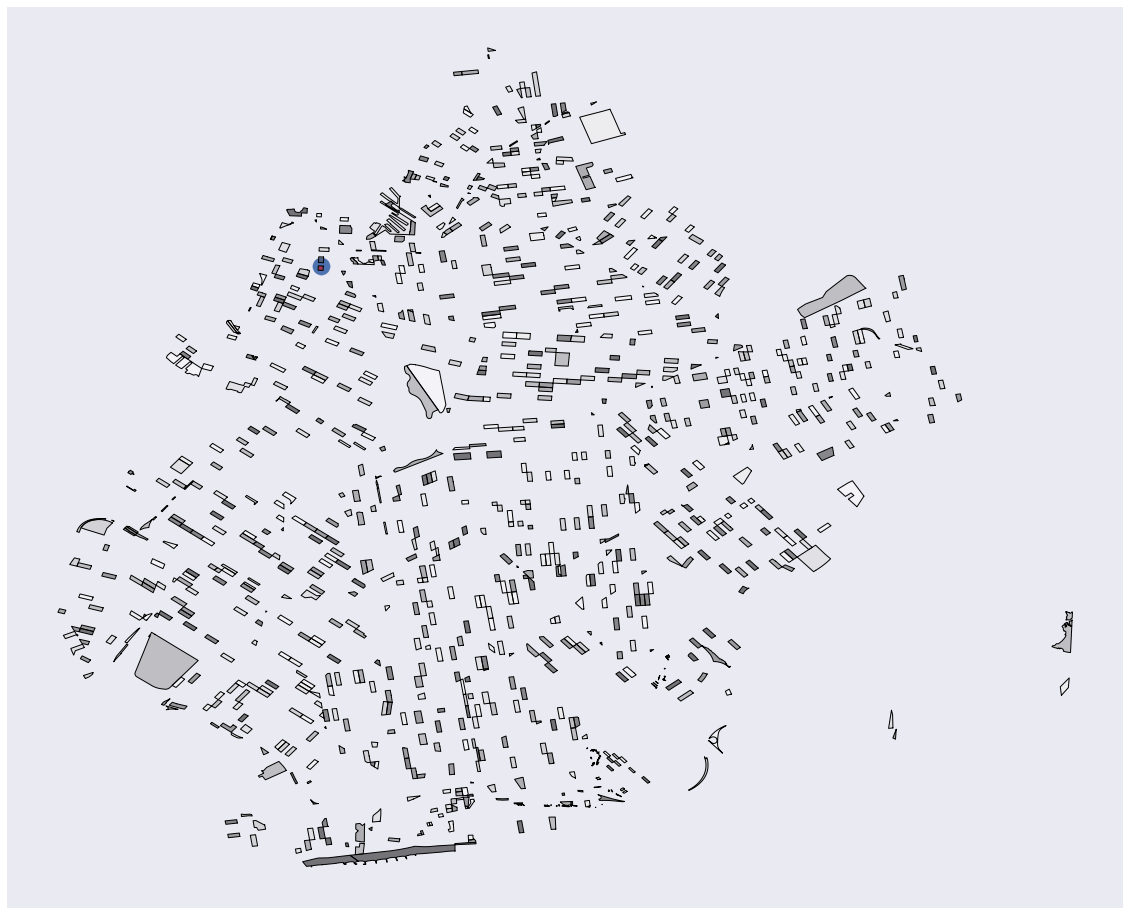

In [7]:
ax = ct_latlon[::10].plot(figsize=(20,20))
ct_latlon.iloc[isave:isave+1].plot(color='red',ax =ax)
ax.scatter(-73.9866,40.6931, s=300)

ax.set_xticks([])
ax.set_yticks([])